# Lottery Voters

In [1]:
from base_imports import *

## Mapping

In [4]:
state = gpd.read_file('data0_raw/shapefiles/census_counties_2017/cb_2017_us_county_500k.shp')
nc = state[state['STATEFP'] == '37']

In [25]:
test = nc.dissolve(by='STATEFP')

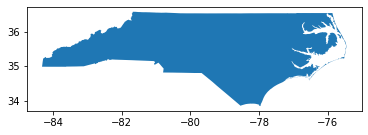

In [26]:
test.plot()

In [21]:
statezip = gpd.read_file('shapefiles0/tl_2019_us_zcta510.dbf')

In [52]:
nczip = statezip[statezip.ZCTA5CE10.isin(zipcodes)]

In [53]:
nczip

,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
221,27030,27030,B5,G6350,S,441866998,2813713,+36.4898143,-080.6292139,"POLYGON ((-80.849654 36.479169, -80.847807 36...."
222,27040,27040,B5,G6350,S,69136406,846193,+36.1693118,-080.3930448,"POLYGON ((-80.443755 36.181772, -80.443744 36...."
223,27041,27041,B5,G6350,S,152796802,942300,+36.4252534,-080.4871973,"POLYGON ((-80.57252799999999 36.430108, -80.57..."
225,27043,27043,B5,G6350,S,185554306,1778801,+36.3345944,-080.4517305,"POLYGON ((-80.555555 36.344167, -80.5554679999..."
226,27045,27045,B5,G6350,S,60009122,179108,+36.2343984,-080.2960701,"POLYGON ((-80.35793 36.2263, -80.3578349999999..."
...,...,...,...,...,...,...,...,...,...,...
30524,28560,28560,B5,G6350,S,304169698,65656481,+35.1266950,-076.9776282,"POLYGON ((-77.15578599999999 35.149345, -77.15..."
30525,28562,28562,B5,G6350,S,399456203,9526000,+35.0798806,-077.1258950,"POLYGON ((-77.329218 35.149924, -77.3289779999..."
30526,28570,28570,B5,G6350,S,322276535,23072628,+34.7814865,-076.8574973,"POLYGON ((-77.05456099999999 34.711386, -77.05..."
30527,28571,28571,B5,G6350,S,133741247,60750545,+35.0707729,-076.6892401,"POLYGON ((-76.829562 35.050271, -76.828267 35...."


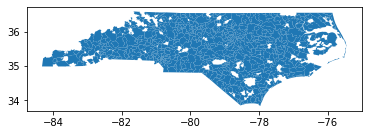

In [54]:
nczip.plot()

In [38]:
sales = pd.read_excel('data0/lottery/Sales_by_Zipcode_FY2009 (July 2008- Jun 2009).xlsx')

In [55]:
sales.head()

,fiscal_year,year,month_name,Game_Type,Game_Name,Zip,NetSales_Amt
0,2009,2008,AUGUST,Instant,$100 Million Cash Spectacular,27006,300.0
1,2009,2008,AUGUST,Instant,$100 Million Cash Spectacular,27009,0.0
2,2009,2008,AUGUST,Instant,$100 Million Cash Spectacular,27011,300.0
3,2009,2008,AUGUST,Instant,$100 Million Cash Spectacular,27012,300.0
4,2009,2008,AUGUST,Instant,$100 Million Cash Spectacular,27013,900.0


In [58]:
zipcodes = [str(x) for x in sales.Zip.unique()]
games = list(sales.Game_Name.unique())

In [62]:
gamesales = sales[(sales.Game_Name == 'Powerball') & (sales.month_name == 'AUGUST')]

In [63]:
gamesales

,fiscal_year,year,month_name,Game_Type,Game_Name,Zip,NetSales_Amt
36254,2009,2008,AUGUST,Draw Game,Powerball,27006,23767.0
36255,2009,2008,AUGUST,Draw Game,Powerball,27009,2138.0
36256,2009,2008,AUGUST,Draw Game,Powerball,27011,2140.0
36257,2009,2008,AUGUST,Draw Game,Powerball,27012,59910.0
36258,2009,2008,AUGUST,Draw Game,Powerball,27013,9522.0
...,...,...,...,...,...,...,...
36956,2009,2008,AUGUST,Draw Game,Powerball,28806,71850.0
36957,2009,2008,AUGUST,Draw Game,Powerball,28901,5491.0
36958,2009,2008,AUGUST,Draw Game,Powerball,28904,5752.0
36959,2009,2008,AUGUST,Draw Game,Powerball,28905,1037.0


In [64]:
len(zipcodes)

714

## NC Voter History Questions

In [ ]:
data = pd.read_csv('data0/NC/snapshots/VR_Snapshot_20190101.csv', dtype='str')

In [32]:
data.head()

,ÿþsnapshot_dt,county_id,county_desc,voter_reg_num,ncid,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,...,dist_1_abbrv,dist_1_desc,dist_2_abbrv,dist_2_desc,confidential_ind,cancellation_dt,vtd_abbrv,vtd_desc,load_dt,age_group
0,2019-01-01,1,ALAMANCE,595600,AA5763,A,ACTIVE,AV,VERIFIED,,...,17,17TH PROSECUTORIAL,,NaN,N,1900-01-01,064,064,2019-01-01,Age Over 66
1,2019-01-01,1,ALAMANCE,1200,AA2036,R,REMOVED,RL,MOVED FROM COUNTY,,...,,NaN,,NaN,N,1900-01-01,,NaN,2019-01-01,Age Over 66
2,2019-01-01,1,ALAMANCE,2200,AA2038,R,REMOVED,RD,DECEASED,,...,,NaN,,NaN,N,2007-01-19,,NaN,2019-01-01,Age Over 66
3,2019-01-01,1,ALAMANCE,4100,AA2052,A,ACTIVE,AV,VERIFIED,,...,17,17TH PROSECUTORIAL,,NaN,N,1900-01-01,06E,06E,2019-01-01,Age Over 66
4,2019-01-01,1,ALAMANCE,6400,AA2061,R,REMOVED,RD,DECEASED,,...,,NaN,,NaN,N,2016-05-03,,NaN,2019-01-01,Age Over 66


In [31]:
data8 = pd.read_csv('data0/NC/snapshots/VR_Snapshot_20081104.csv', dtype='str')

In [40]:
data8.head()

,snapshot_dt,county_id,county_desc,voter_reg_num,ncid,status_cd,voter_status_desc,reason_cd,voter_status_reason_desc,absent_ind,...,dist_2_desc,confidential_ind,cancellation_dt,vtd_abbrv,vtd_desc,load_dt,age_group,v91,v92,v93
0,2008-11-04 00:00:00,18,CATAWBA,0,AW2035,R,REMOVED,RL,MOVED FROM COUNTY,N,...,NaN,N,NaN,,NaN,2010-01-22 15:46:57.133000000,41 TO 65,NaN,NaN,NaN
1,2008-11-04 00:00:00,7,BEAUFORT,0,AG2035,R,REMOVED,R2,DUPLICATE,N,...,NaN,N,2001-07-06 00:00:00,,NaN,2010-01-22 15:46:57.133000000,26 TO 40,NaN,NaN,NaN
2,2008-11-04 00:00:00,10,BRUNSWICK,0,AK2035,R,REMOVED,R2,DUPLICATE,N,...,NaN,N,2001-02-05 00:00:00,,NaN,2010-01-22 15:46:57.133000000,66 AND ABOVE,NaN,NaN,NaN
3,2008-11-04 00:00:00,16,CARTERET,0,AS2035,R,REMOVED,RP,REMOVED UNDER OLD PURGE LAW,N,...,NaN,N,NaN,,NaN,2010-01-22 15:46:57.133000000,41 TO 65,NaN,NaN,NaN
4,2008-11-04 00:00:00,58,MARTIN,0,CS2035,R,REMOVED,R2,DUPLICATE,N,...,NaN,N,2001-03-15 00:00:00,,NaN,2010-01-22 15:46:57.133000000,66 AND ABOVE,NaN,NaN,NaN


In [38]:
data.loc[:,'cancel_year'] = [str(x).split('-')[0] for x in data.cancellation_dt]

In [41]:
data8.loc[:,'cancel_year'] = [str(x).split('-')[0] for x in data8.cancellation_dt]

In [3]:
state = 'NC'
year = 2019
filepath0 = 'data0/'+state+'/'+state+'_'+str(year)+'/'
file = 'ncvhis_Statewide.txt'
nchist = pd.read_csv(filepath0+file, dtype='str', quoting=3, delimiter='\t')

In [9]:
nchist = nchist.rename(columns={col:col.strip('""') for col in nchist.columns.values})
for col in nchist.columns.values:
    nchist.loc[:,col] = [str(x).strip('""') for x in nchist[col]]
    print(col)

county_id
county_desc
voter_reg_num
election_lbl
election_desc
voting_method
voted_party_cd
voted_party_desc
pct_label
pct_description
ncid
voted_county_id
voted_county_desc
vtd_label
vtd_description


#### How many voters in 2008 don't appear in the history?

In [49]:
notcurent = nchist[~nchist.ncid.isin(data8.ncid.unique())]
len(notcurent.ncid.unique())

252050

In [50]:
print('Out of', len(data8.ncid.unique()))

Out of 9360067


In [48]:
# These are both the voters who didn't vote and those who voted and are no longer voters

In [ ]:
# What we would worry about are the voters who participate in 2008 but are removed due to inactivity

In [51]:
252050/9360067

0.02692822604795457

#### How many voters who voted in 2008 don't appear in the current snapshot?

In [46]:
x = nchist.election_desc[0]

In [47]:
datanot8 = nchist[(nchist.election_desc == x) & (~nchist.ncid.isin(data.ncid.unique()))]
len(datanot8)

322

In [ ]:
# These are the voters who left the dataset recently.